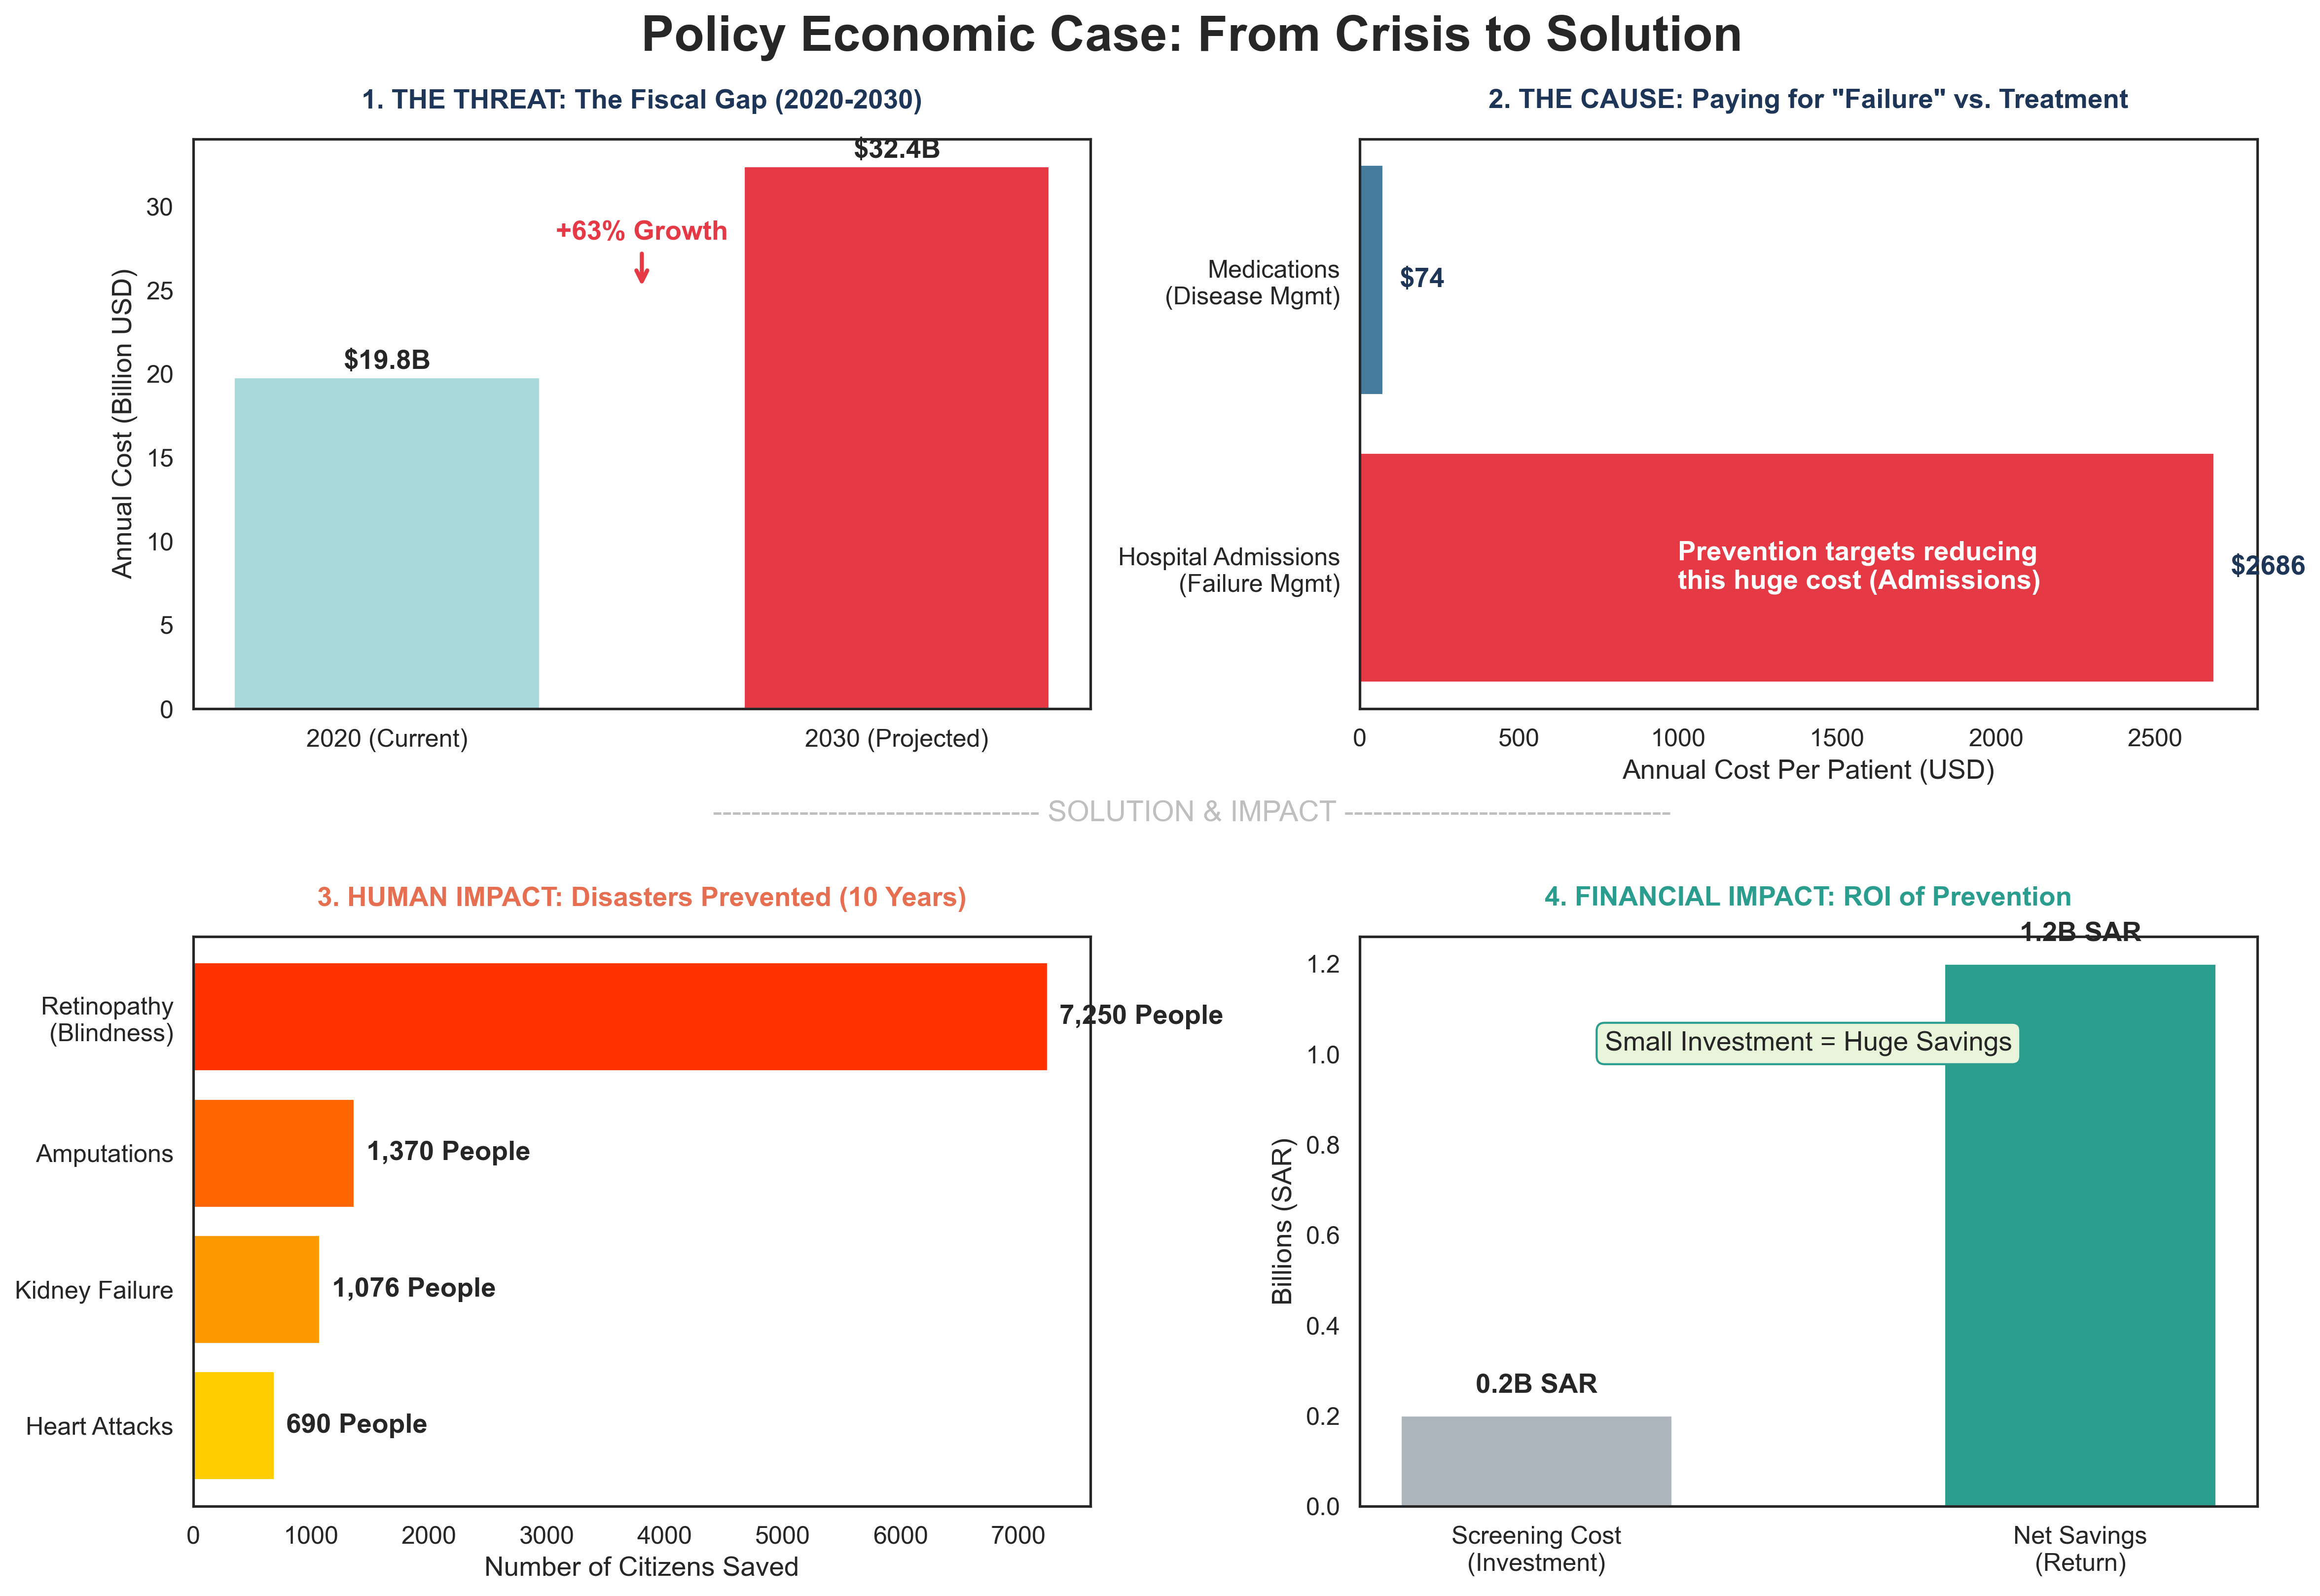

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================================
# 1. إعداد البيانات (تجميع أهم الأرقام)
# ==========================================

# أ. بيانات النمو الكلي (The Problem)
macro_data = {
    'Year': ['2020 (Current)', '2030 (Projected)'],
    'Cost': [19.8, 32.4] # مليار دولار
}

# ب. بيانات أسباب الهدر (The Cause)
# نركز على المقارنة الصادمة: التنويم vs الأدوية
micro_data = {
    'Cost Center': ['Hospital Admissions\n(Failure Mgmt)', 'Medications\n(Disease Mgmt)'],
    'Cost_Per_Patient': [2686, 74] # دولار
}

# ج. بيانات الأثر الإنساني (The Human Solution)
# عدد الحالات المتجنبة خلال 10 سنوات (من تحليل 48 ألف حالة)
human_data = {
    'Disaster Prevented': ['Retinopathy\n(Blindness)', 'Kidney Failure', 'Heart Attacks', 'Amputations'],
    'Cases': [7250, 1076, 690, 1370]
}
df_human = pd.DataFrame(human_data).sort_values('Cases', ascending=True)

# د. بيانات العائد المالي (The Financial Solution)
roi_data = {
    'Item': ['Screening Cost\n(Investment)', 'Net Savings\n(Return)'],
    'Value_Bn_SAR': [0.2, 1.2] # مليار ريال
}

# ==========================================
# 2. رسم اللوحة القصصية (Dashboard Design)
# ==========================================
sns.set_theme(style="white", font_scale=1.1)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['figure.dpi'] = 300

# إنشاء شبكة 2x2
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# --- 1. الرسم الأول: المشكلة (فجوة 2030) ---
ax1 = axes[0, 0]
colors_1 = ['#A8DADC', '#E63946'] # أزرق للحاضر، أحمر للخطر القادم
bars1 = ax1.bar(macro_data['Year'], macro_data['Cost'], color=colors_1, width=0.6)
ax1.set_title('1. THE THREAT: The Fiscal Gap (2020-2030)', fontweight='bold', pad=15, color='#1D3557')
ax1.set_ylabel('Annual Cost (Billion USD)')
# إضافة نسبة النمو
ax1.annotate('+63% Growth', xy=(0.5, 25), xytext=(0.5, 28), ha='center', color='#E63946', fontweight='bold',
             arrowprops=dict(arrowstyle='->', color='#E63946', lw=2))
for p in bars1:
    ax1.text(p.get_x() + p.get_width()/2, p.get_height() + 0.5, f'${p.get_height()}B', ha='center', fontweight='bold')


# --- 2. الرسم الثاني: السبب (التنويم هو الغول) ---
ax2 = axes[0, 1]
colors_2 = ['#E63946', '#457B9D']
bars2 = ax2.barh(micro_data['Cost Center'], micro_data['Cost_Per_Patient'], color=colors_2)
ax2.set_title('2. THE CAUSE: Paying for "Failure" vs. Treatment', fontweight='bold', pad=15, color='#1D3557')
ax2.set_xlabel('Annual Cost Per Patient (USD)')
# إضافة النص
ax2.text(1000, 0, 'Prevention targets reducing\nthis huge cost (Admissions)', color='white', fontweight='bold', va='center')
for p in bars2:
    ax2.text(p.get_width() + 50, p.get_y() + p.get_height()/2, f'${p.get_width()}', va='center', fontweight='bold', color='#1D3557')


# --- 3. الرسم الثالث: الأثر الإنساني (الإنقاذ) ---
ax3 = axes[1, 0]
# ألوان دافئة تعبر عن الحياة والصحة
colors_3 = sns.color_palette("autumn_r", len(df_human))
bars3 = ax3.barh(df_human['Disaster Prevented'], df_human['Cases'], color=colors_3)
ax3.set_title('3. HUMAN IMPACT: Disasters Prevented (10 Years)', fontweight='bold', pad=15, color='#E76F51')
ax3.set_xlabel('Number of Citizens Saved')
for p in bars3:
    ax3.text(p.get_width() + 100, p.get_y() + p.get_height()/2, f'{int(p.get_width()):,} People', va='center', fontweight='bold')


# --- 4. الرسم الرابع: الأثر المالي (العائد) ---
ax4 = axes[1, 1]
colors_4 = ['#ADB5BD', '#2A9D8F'] # رمادي للتكلفة، أخضر للربح
bars4 = ax4.bar(roi_data['Item'], roi_data['Value_Bn_SAR'], color=colors_4, width=0.5)
ax4.set_title('4. FINANCIAL IMPACT: ROI of Prevention', fontweight='bold', pad=15, color='#2A9D8F')
ax4.set_ylabel('Billions (SAR)')
for p in bars4:
    ax4.text(p.get_x() + p.get_width()/2, p.get_height() + 0.05, f'{p.get_height()}B SAR', ha='center', fontweight='bold')
# نص توضيحي
ax4.text(0.5, 0.8, 'Small Investment = Huge Savings', transform=ax4.transAxes, ha='center', 
         bbox=dict(boxstyle='round', facecolor='#E9F5DB', edgecolor='#2A9D8F'))


# --- تجميل وإخراج نهائي ---
plt.suptitle('Policy Economic Case: From Crisis to Solution', fontsize=24, fontweight='bold', y=0.95)
# إضافة خط فاصل بين الصفوف
plt.figtext(0.5, 0.5, '---------------------------------- SOLUTION & IMPACT ----------------------------------', 
            ha='center', va='center', fontsize=14, color='grey', alpha=0.5)

plt.savefig('Policy_Story_Dashboard.png', bbox_inches='tight')
plt.show()